In [3]:
#PCA = Principle Components Analysis

#1st step: calculate the means of objects by each feature (store in M)
#2nd step: create Center matrix by subtract origin matrix (A) by M, i.e Center = A - M
#3rd step: calculate the covariance matrix for Center matrix (store in Cov)
#4th step: do the eigendecomposition for covariance matrix Cov, assuming hav m eigenvectors as well as eigenvalues
#5th step: choose the k<m eigenvectors corresponding to k<m biggest eigenvalues
#6th step: project the Center matrix into k-dimension by multiplying Center.dot(k-eigenvectors)

#------------------------------------------------
#In the 4th step, can use SVD decomposition instead of eigendecomposition in some cases

In [4]:
"""=============================================================================
    Ex1: Tính toán PCA
        a) Tạo một ma trận A(100, 3) có các giá trị ngẫu nhiên từ 1 đến 255
        b) Áp dụng tính toán PCA
        c) Trực quan hóa kết quả 
============================================================================="""
print('--------------------CAU 1: calculate PCA manually-------------------')
import numpy as np
from numpy.linalg import eig
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sbn

print('\n*****a) Create an A matrix (100,3) whose values range from 1 to 255')

np.random.seed(1) #set the .seed(1) so that every time we rerun, the matrix created by np.random.randint() is the same

A = np.random.randint(1,256, size=(100,3))

print('Matrix A'+str(A.shape)+' =\n',pd.DataFrame(A)) # 3 columns represent 3 different features
                                                # 100 rows represent 100 different objects

--------------------CAU 1: calculate PCA manually-------------------

*****a) Create an A matrix (100,3) whose values range from 1 to 255
Matrix A(100, 3) =
       0    1    2
0    38  236  141
1    73  138  204
2   134   80  193
3   145  130  205
4    72  238  253
..  ...  ...  ...
95   75  137  110
96  100   33    9
97   85  206   51
98   80  170   65
99  109  212   25

[100 rows x 3 columns]


In [5]:
print('\n*****b) Calculate the PCA manually')

M = np.mean(A, axis=0) #Use axis = 0 to browse take objects from each the row of one column to calculate mean
                       # so basically, it will calculate mean by column, vertically
print('1st step: M means calculated by columns of matrix A =',M)

Center = A - M #Creating a Center matrix by subtracting A matrix with its means M by column
               # so, Center matrix will store the difference between each object and the mean value
               # by doing this, the M means become the origin of x-y-z coordinates

print('\n2nd step: Center matrix = A - M =\n',pd.DataFrame(Center))

CovA = np.cov(Center.T) #Calculate the covariance matrix between 3 features (aka 3 columns)
            #Covariance is a measure of joint variability between factors (do bien thien cung nhau, thuan hay nghich)
                        #the numpy.cov() of python help to calculate the covariance matrix
                    #since np.cov() considers rows as features and columns as objects, we have to transpose Center matrix
print('\n3rd step: covariance matrix CovA'+str(CovA.shape)+' between 3 features(columns) of matrix A =\n',pd.DataFrame(CovA))



print('\n4th step: Do the eigendecompostion for CovA matrix ')
eigval,eigvect = eig(CovA) #Do the eigendecompostion for CovA matrix
print('Eigenvalues of CovA matrix =', eigval)
print('\nEigenvectors of CovA by columns =\n',eigvect)
print()
for i in range(len(eigval)):
    print('The covariance ratio of component',i+1,'=',eigval[i]/eigval[:].sum())

#print('\n5th step: Retain only first 2 eigenvectors to project Center matrix =\n',Center[:,:2].dot(eigvect[:,:2].T))
Project_Center = Center.dot(eigvect[:,:2]) #To project a matrix with eigenvectos, using Matrix.Eigenvectors
                                           #Since we retain only 2 components, use eigvet[:,:2]
print('\n5th step: Retain only first 2 eigenvectors to project Center matrix (first 20 lines) =\n',pd.DataFrame(Project_Center))


*****b) Calculate the PCA manually
1st step: M means calculated by columns of matrix A = [127.94 129.43 122.12]

2nd step: Center matrix = A - M =
         0       1       2
0  -89.94  106.57   18.88
1  -54.94    8.57   81.88
2    6.06  -49.43   70.88
3   17.06    0.57   82.88
4  -55.94  108.57  130.88
..    ...     ...     ...
95 -52.94    7.57  -12.12
96 -27.94  -96.43 -113.12
97 -42.94   76.57  -71.12
98 -47.94   40.57  -57.12
99 -18.94   82.57  -97.12

[100 rows x 3 columns]

3rd step: covariance matrix CovA(3, 3) between 3 features(columns) of matrix A =
              0            1            2
0  5466.157980  -197.862828  -470.730101
1  -197.862828  5658.469798   513.998384
2  -470.730101   513.998384  5615.662222

4th step: Do the eigendecompostion for CovA matrix 
Eigenvalues of CovA matrix = [6396.16302451 5360.88160261 4983.24537287]

Eigenvectors of CovA by columns =
 [[-0.46152394  0.69413697  0.55242151]
 [ 0.58715054  0.70581162 -0.39633849]
 [ 0.66501872 -0.14143489  0


*****c) Visualization for the Center matrix and Projec_Center matrix


/home/long/Documents/DataScience_hcmus/vir_env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/long/Documents/DataScience_hcmus/vir_env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/long/Documents/DataScience_hcmus/vir_env/lib/python3.12/site-packages/seaborn/relational.py:456: RuntimeWarning: invalid value encountered in sqrt
  linewidth = .08 * np.sqrt(np.percentile(sizes, 10))
/home/long/Documents/DataScience_hcmus/vir_env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


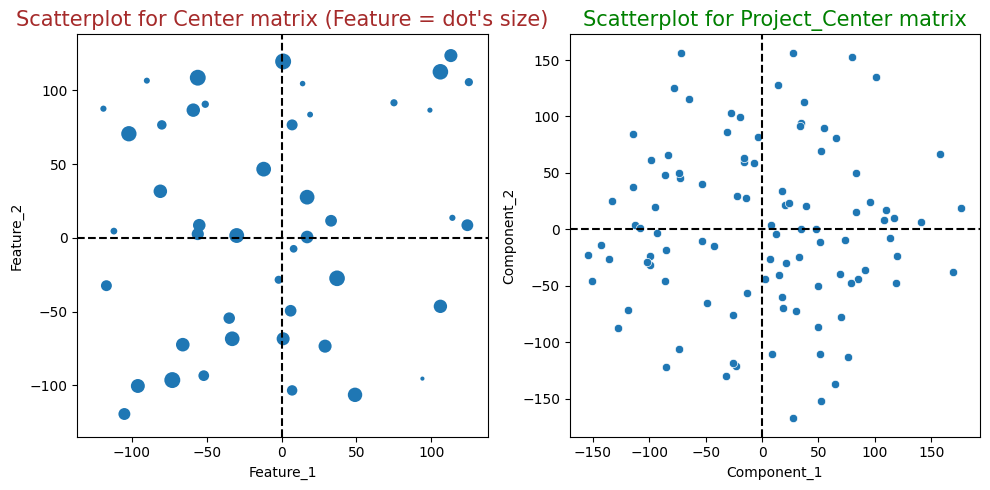

In [9]:
print('\n*****c) Visualization for the Center matrix and Projec_Center matrix')

#---------Create dataframe-----------#
df_Center = pd.DataFrame(Center, columns =['Feature_1','Feature_2','Feature_3'])
df_Project_Center = pd.DataFrame(Project_Center, columns=['Component_1', 'Component_2'])

#------------Draw plot-------------------------#
fig = plt.figure(figsize=(10,5));

grsp = gridspec.GridSpec(nrows=1, ncols=2)

Center_fig = fig.add_subplot(grsp[0,0])
sbn.scatterplot(x=df_Center['Feature_1'], y=df_Center['Feature_2'], s=df_Center['Feature_3']) 
                                                       #s= to visualize Feature_3 as the sizes of each dot
Center_fig.set_title("Scatterplot for Center matrix (Feature = dot's size)", color='brown', size=15)
Center_fig.axvline(x=0, color='black', linestyle='--') #axvline(x=0) to add a vertical line x=0
Center_fig.axhline(y=0, color='black', linestyle='--') #axhline(y=0) to add a horizontal line y=0
Center_fig.set_xlabel('Feature_1')
Center_fig.set_ylabel('Feature_2')

Project_Center_fig = fig.add_subplot(grsp[0,1])
sbn.scatterplot(x=df_Project_Center['Component_1'], y=df_Project_Center['Component_2'])
Project_Center_fig.set_title('Scatterplot for Project_Center matrix', color='green',size=15)
Project_Center_fig.axvline(x=0, color='black', linestyle='--')
Project_Center_fig.axhline(y=0, color='black', linestyle='--')
Project_Center_fig.set_xlabel('Component_1')
Project_Center_fig.set_ylabel('Component_2')

fig.tight_layout()

plt.show()